## Accomadation Prediction 



### Problem Statement

Your neighbour is a real estate agent and wants some help predicting housing prices for regions in a city. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for. She has asked you if you could help her out with your new data science skills. Your neighbour then gives you some information about a bunch of houses in regions of the city, it is all in the data set: domum.csv

### why it is necessary for an organisation to solve this problem?

There are multiple real estate classified websites where properties are listed for sell/buy/rent purposes such as 99acres , housing , commonfloor, magicbricks and more.

In these websites there are some cases when similar apartments are priced differently and thus there is lot of in-transparency

Sometimes the consumers may feel the pricing is not justified for a particular listed apartment but there no way to confirm that either

Proper and justified prices of properties can bring in a lot of transparency and trust back to the real estate industry,
which is very important as for most consumers also.

addressing this issue will help both the customers and the real estate industry in the long run

Therefore, the goal of this project is to use machine learning to predict the selling prices of
houses based on certain input features

### Fields in the dataset:
- 'Avg. Area Income': Avg. Income of residents of the city house is located in. 
- 'Avg. Area House Age': Avg Age of Houses in same city 
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city 
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city 
- 'Area Population': Population of city house is located in 
- 'Price': Price that the house sold at
- 'Address': Address for the house.


### Getting Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('domum.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
import re
states=[]
for i in data['Address']:
    state = re.search('\s[A-Z][A-Z]\s',i)
    states.append(state[0])
data['States'] = states

In [7]:
data['States'].unique()

array([' NE ', ' CA ', ' WI ', ' AP ', ' AE ', ' KS ', ' CO ', ' TN ',
       ' AA ', ' NM ', ' PW ', ' AR ', ' HI ', ' ME ', ' IN ', ' MI ',
       ' DE ', ' AZ ', ' MA ', ' MN ', ' AL ', ' NY ', ' NV ', ' VA ',
       ' ID ', ' OK ', ' NH ', ' MO ', ' WV ', ' WY ', ' MH ', ' UT ',
       ' SD ', ' CT ', ' AK ', ' WA ', ' RI ', ' NJ ', ' KY ', ' NC ',
       ' IA ', ' VT ', ' FM ', ' ND ', ' LA ', ' MP ', ' OR ', ' TX ',
       ' DC ', ' PR ', ' MT ', ' AS ', ' OH ', ' MS ', ' IL ', ' VI ',
       ' GA ', ' PA ', ' MD ', ' SC ', ' GU ', ' FL '], dtype=object)

### Top 10 States where House are More

  States  Count
0    AA     177
1    AP     170
2    AE     167
3    GU      91
4    OR      91
5    DE      89
6    KY      89
7    NC      89
8    VT      86
9    AZ      86


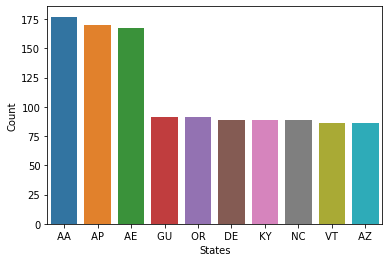

In [8]:
top_states = data['States'].value_counts().head(10).reset_index()
top_states.columns = ['States', 'Count']
print(top_states)
sns.barplot(top_states['States'],top_states['Count'])

## Statistics Descriptive

In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


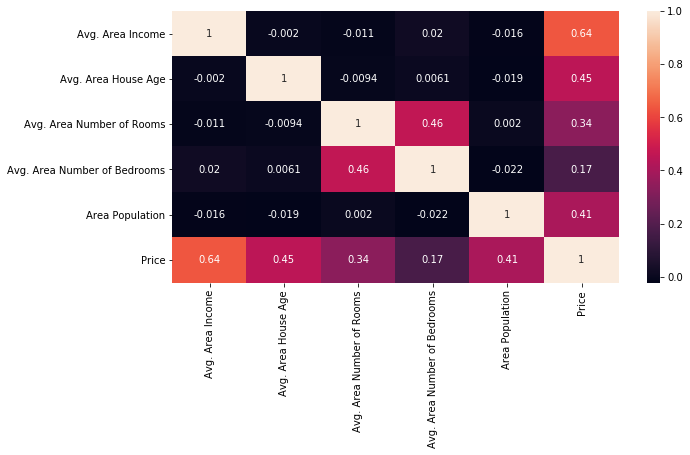

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

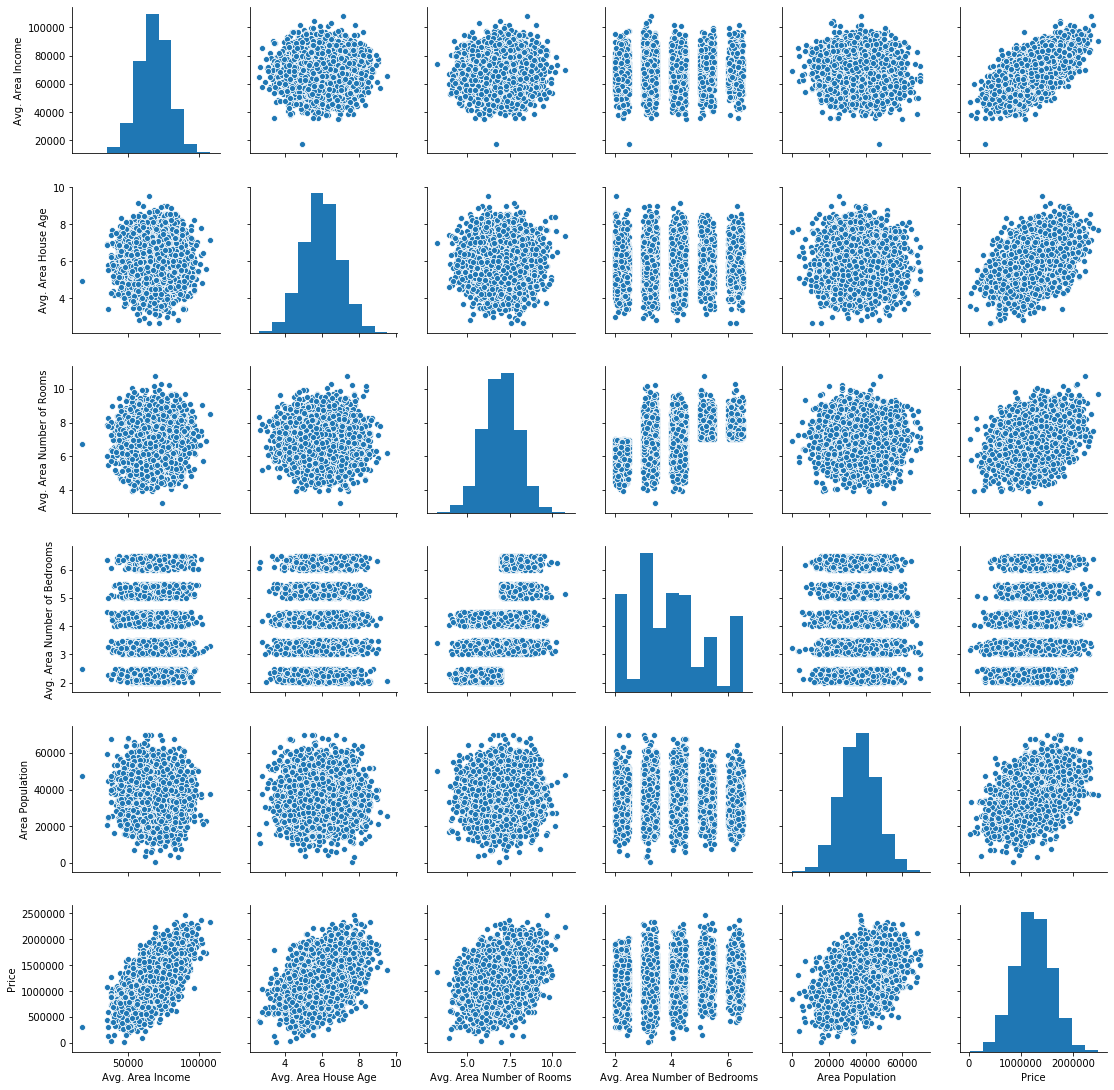

In [12]:
sns.pairplot(data)

### States V/S Avg. Area Income V/S Price

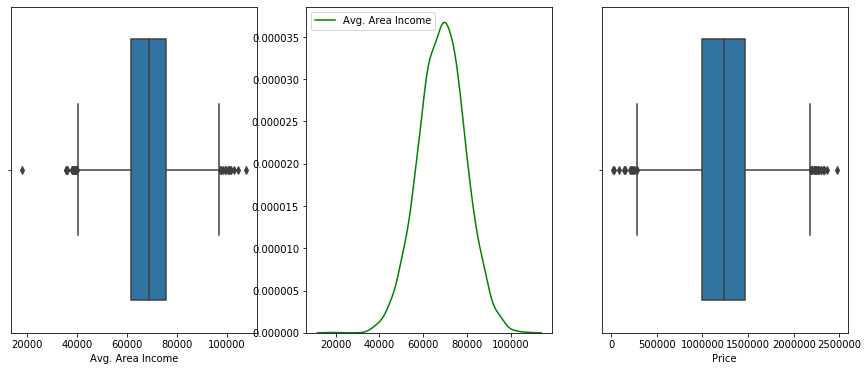

In [13]:
f, axes = plt.subplots(ncols=3,figsize=(15,6))

sns.kdeplot(data['Avg. Area Income'],color='g',ax=axes[1])
sns.boxplot(data['Avg. Area Income'],ax=axes[0])

sns.boxplot(data['Price'],ax=axes[2])

In [14]:
df = data.groupby('States')[['Avg. Area Income','Price']].median().reset_index()

In [15]:
df = df.sort_values('Avg. Area Income',ascending=False).head()
df

,States,Avg. Area Income,Price
53,TX,71845.211090,1.321004e+06
2,AK,71813.757842,1.344523e+06
22,KS,71701.841803,1.280670e+06
39,NJ,71677.307330,1.279804e+06
43,OH,71557.118822,1.265161e+06


Text(0, 0.5, 'Price')

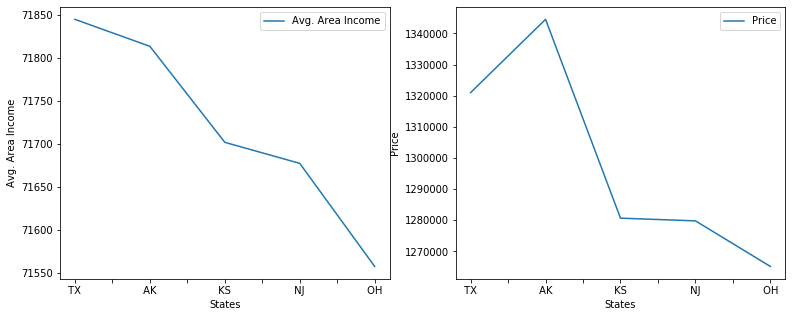

In [16]:
# plt.figure(figsize=(15,8))
f, axes = plt.subplots(ncols=2,figsize=(13,5))
df.plot('States','Avg. Area Income',kind='line',ax=axes[0])
df.plot('States','Price',kind='line',ax=axes[1])
axes[0].set_ylabel('Avg. Area Income')
axes[1].set_ylabel('Price')


The below figure Shows that in top 5 highest Avg. Area Income (Texas having more avg area income fig.1) but in state AK ( Alaska ) having more average price than others fig. 2



## States V/s Poppulation v/s Price 

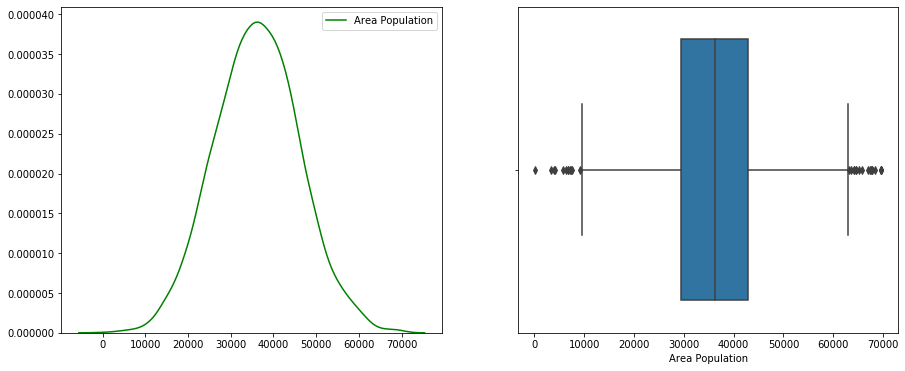

In [17]:
f, axes = plt.subplots(ncols=2,figsize=(15,6))

sns.kdeplot(data['Area Population'],color='g',ax=axes[0])

sns.boxplot(data['Area Population'])

In [18]:
df = data.groupby('States')[['Area Population','Price']].median().reset_index()

In [19]:
df = df.sort_values('Area Population',ascending=False).head()
df

,States,Area Population,Price
12,DE,38627.301473,1.257780e+06
41,NV,38539.580235,1.196128e+06
52,TN,38418.058302,1.208875e+06
2,AK,38345.360609,1.344523e+06
3,AL,37858.061941,1.198133e+06


Text(0, 0.5, 'Price')

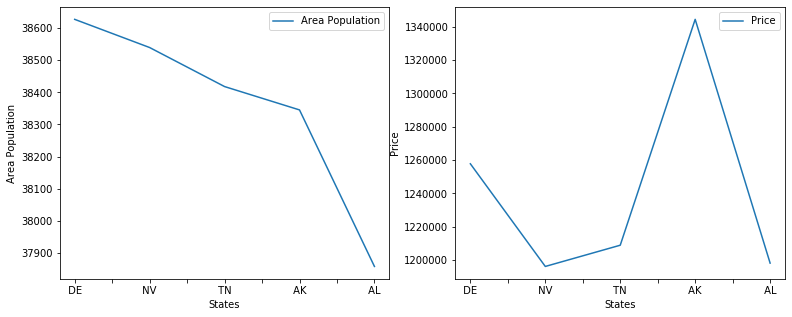

In [20]:
f, axes = plt.subplots(ncols=2,figsize=(13,5))

df.plot('States','Area Population',kind='line',ax= axes[0])
df.plot('States','Price',kind='line',ax=axes[1])
axes[0].set_ylabel('Area Population')
axes[1].set_ylabel('Price')

The below figure Shows that in top 5 highest Area population (Delaware having more population fig .1 ) but in state AK ('Alaska') having more average price than others fig.2

## States v/s Avg. Area Number of Rooms v/s Price

In [21]:
df = data.groupby('States')[['Avg. Area Number of Rooms','Price']].median().reset_index()

In [22]:
df = df.sort_values('Avg. Area Number of Rooms',ascending=False).head()
df

,States,Avg. Area Number of Rooms,Price
13,FL,7.332770,1.200402e+06
37,NE,7.297959,1.236645e+06
29,MI,7.259001,1.241387e+06
9,CO,7.257604,1.333015e+06
16,GU,7.199156,1.231157e+06


Text(0, 0.5, 'Price')

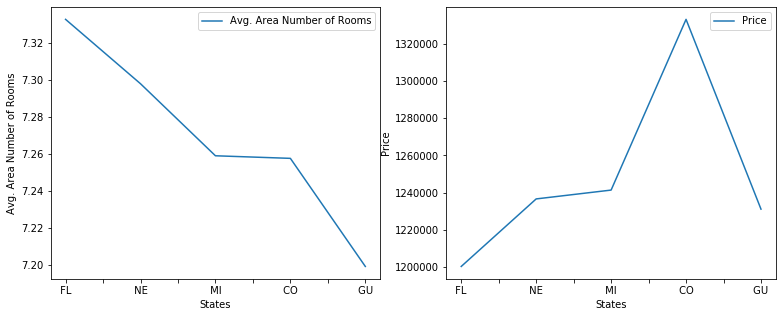

In [23]:
f, axes = plt.subplots(ncols=2,figsize=(13,5))

df.plot('States','Avg. Area Number of Rooms',kind='line',ax= axes[0])
df.plot('States','Price',kind='line',ax=axes[1])
axes[0].set_ylabel('Avg. Area Number of Rooms')
axes[1].set_ylabel('Price')

The below figure Shows that in top 5 States of  Avg. Area Number of Rooms (Florida having more avg number of rooms fig.1) but in state AK 
( Colorado ) having more average price than others fig. 2

### what is average price of houses where avg Income is less than 60k dollars  

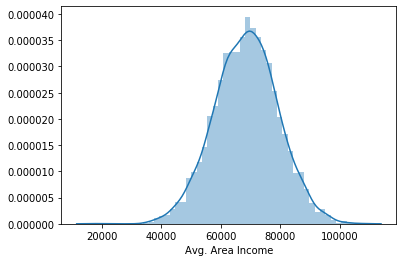

In [24]:
sns.distplot(data['Avg. Area Income'])

In [25]:
df_1 = data[data['Avg. Area Income']<=60000]

922142.779075537

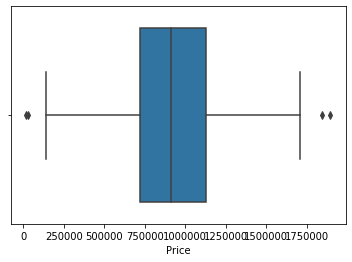

In [26]:
sns.boxplot(df_1['Price'])
df_1['Price'].mean()

which are adresses having house price less than 60000 dollars and less than or equal to 4 bedrooms?

In [27]:
df_1[(df_1['Price']<=60000) & (df_1['Avg. Area Number of Bedrooms']<=4)].sort_values('Price')[['Address','States']].head()

,Address,States
3212,"91410 Megan Camp Suite 360\nLaurafort, OH 15735",OH
1271,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919",MT


### what is average price of houses where avg Income is greater than 80k dollars ?

In [28]:
df_2 = data[data['Avg. Area Income']>=80000]
df_2['Price'].mean()

1597382.3754001334

### which are adresses having house price more than 1.8 dollars and more than 4 bedrooms?

In [29]:
df_2['Price'].quantile(0.85)

1883046.0947609148

In [30]:
df_2[(df_2['Price']>=1800000) & (df_2['Avg. Area Number of Bedrooms']>=4)].sort_values('Price')[['Address','States']].head()

,Address,States
1910,"51460 Mccarthy Rapids Apt. 936\nHuberburgh, MO...",MO
2247,"0559 Bryan Plains\nChristinaburgh, KY 52933",KY
601,"1388 Logan Ports\nNorth Johnstad, SD 46743",SD
122,"922 Mark Lodge\nMatthewton, ID 71131-3139",ID
3082,"77477 Carolyn Station\nWilliamview, CT 43341-8573",CT


## Rich peoples are they intersted in age of House, number of rooms and bedrooms ?
we take rich peoples having income more than quantile of 0.75

In [31]:
rich_df = data[data['Avg. Area Income']>=data['Avg. Area Income'].quantile(0.75)]

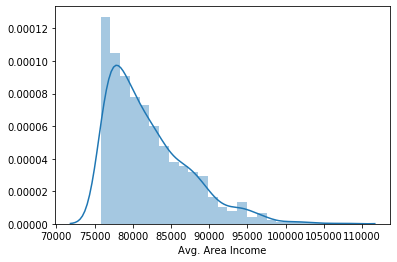

In [32]:
sns.distplot(rich_df['Avg. Area Income'])

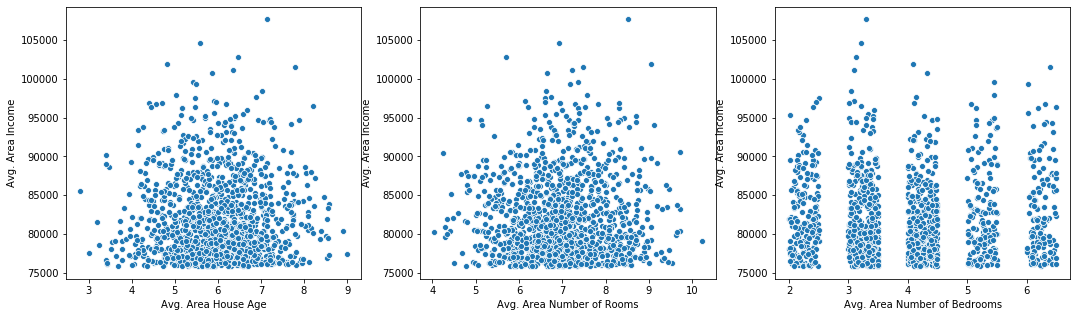

In [33]:
f, axes = plt.subplots(ncols=3,figsize=(18,5))
sns.scatterplot(rich_df['Avg. Area House Age'],rich_df['Avg. Area Income'],ax=axes[0])
sns.scatterplot(rich_df['Avg. Area Number of Rooms'],rich_df['Avg. Area Income'],ax=axes[1])
sns.scatterplot(rich_df['Avg. Area Number of Bedrooms'],rich_df['Avg. Area Income'])


#### top 5 States where rich peoples are stayed

In [34]:
rich_df['States'].value_counts().head()

 AA     45
 AE     42
 AP     42
 TX     31
 KY     29
Name: States, dtype: int64

## Less income peoples are they intersted in age of house,number of rooms , bedrooms
- we take less income people as income less than quantile of 0.25

In [35]:
less_income_df = data[data['Avg. Area Income']<=data['Avg. Area Income'].quantile(0.25)]

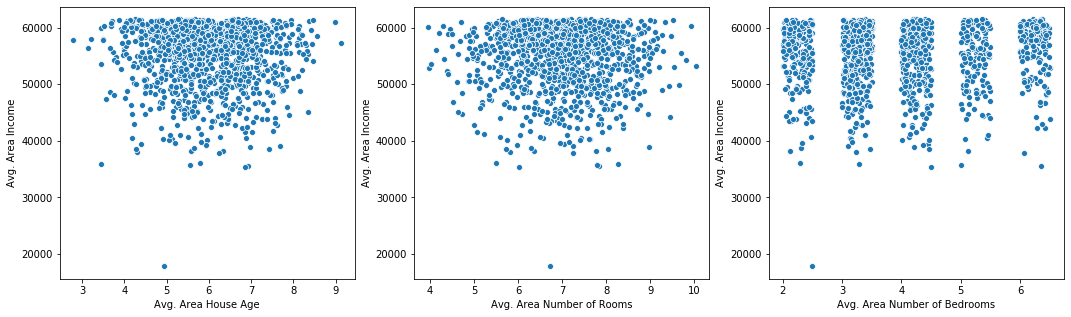

In [36]:
f, axes = plt.subplots(ncols=3,figsize=(18,5))
sns.scatterplot(less_income_df['Avg. Area House Age'],less_income_df['Avg. Area Income'],ax=axes[0])
sns.scatterplot(less_income_df['Avg. Area Number of Rooms'],less_income_df['Avg. Area Income'],ax=axes[1])
sns.scatterplot(less_income_df['Avg. Area Number of Bedrooms'],less_income_df['Avg. Area Income'])

#### top 5 States where les income peoples are stayed

In [37]:
less_income_df['States'].value_counts().head()

 AP     44
 AE     39
 AA     37
 GU     30
 MP     28
Name: States, dtype: int64

### Preprocessing

In [38]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,Normalizer,StandardScaler

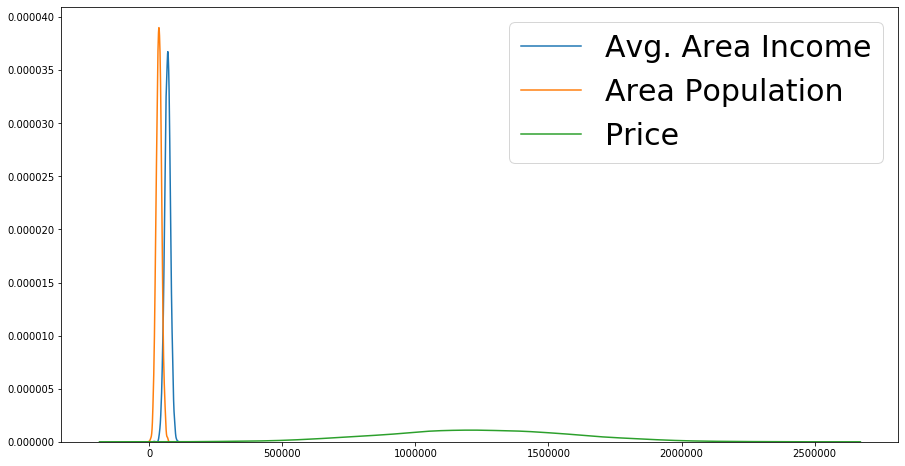

In [39]:
plt.figure(figsize=(15,8))
# plt.ylim(0,0.12)

sns.kdeplot(data['Avg. Area Income'])
sns.kdeplot(data['Area Population'])
sns.kdeplot(data['Price'])
plt.legend(fontsize=30)

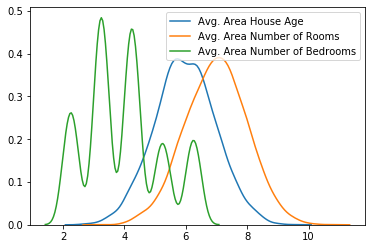

In [40]:

sns.kdeplot(data['Avg. Area House Age'])
sns.kdeplot(data['Avg. Area Number of Rooms'])
sns.kdeplot(data['Avg. Area Number of Bedrooms'])


### StandardScaler
- Data standardization is the process of rescaling one or more attributes 
- The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the       distribution is now centred around 0, with a standard deviation of 1.

- Calculate - Subtract mean of column & div by standard deviation
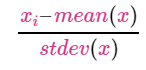



In [41]:
numdf=data._get_numeric_data()


In [42]:
numdf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [43]:
scalar = StandardScaler()

In [44]:
scaled_data = scalar.fit_transform(numdf)
scaled_data 

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867,
        -0.49008146],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945,
         0.77550829],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989,
        -0.49021053],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658,
        -0.570244  ],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608,
        -0.0946402 ],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464,
         0.18941143]])

In [45]:
scaled_df=pd.DataFrame(scaled_data)
scaled_df.columns=numdf.columns

In [46]:
scaled_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


In [47]:
scaled_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.259304e-17,-8.176446e-18,-4.058254e-16,-2.029016e-16,-3.464784e-16,-1.390943e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-4.765584e+00,-3.361975e+00,-3.730214e+00,-1.605598e+00,-3.626413e+00,-3.444336e+00
25%,-6.664724e-01,-6.606490e-01,-6.846171e-01,-6.817833e-01,-6.810902e-01,-6.641384e-01
50%,2.075434e-02,-6.852312e-03,1.502401e-02,5.564767e-02,3.616311e-03,1.690042e-03
75%,6.756386e-01,6.794590e-01,6.742146e-01,4.122077e-01,6.748621e-01,6.772856e-01
max,3.670725e+00,3.572745e+00,3.750297e+00,2.041039e+00,3.371219e+00,3.503412e+00


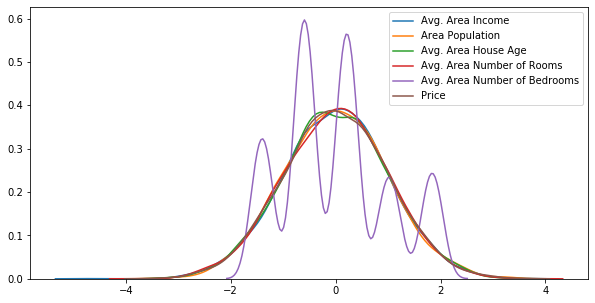

In [48]:
plt.figure(figsize=(10,5))

sns.kdeplot(scaled_df['Avg. Area Income'])
sns.kdeplot(scaled_df['Area Population'])
sns.kdeplot(scaled_df['Avg. Area House Age'])
sns.kdeplot(scaled_df['Avg. Area Number of Rooms'])
sns.kdeplot(scaled_df['Avg. Area Number of Bedrooms'])
sns.kdeplot(scaled_df['Price'])


In [49]:
new_df = scaled_df

In [50]:
new_df['States'] = data['States']

In [51]:
new_df = new_df.rename(index=data['Address'])

In [52]:
new_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,States
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081,NE
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508,CA
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211,WI
USS Barnett\nFPO AP 44820,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843,AP
USNS Raymond\nFPO AE 09386,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518,AE


In [53]:
new_df = pd.get_dummies(new_df,drop_first=True)

In [54]:
new_df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,States_ AE,States_ AK,States_ AL,States_ AP,...,States_ TN,States_ TX,States_ UT,States_ VA,States_ VI,States_ VT,States_ WA,States_ WI,States_ WV,States_ WY
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [56]:
X = new_df.drop('Price',axis=1)
Y = new_df['Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((4000, 66), (1000, 66))

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMse = ",rmse , "R2 = ",r2 )

RMse =  0.29418460974536015 R2 =  0.9127073866328339


In [58]:
# coefficiants
reg.coef_

array([ 0.65378269,  0.46617689,  0.34237396,  0.00772685,  0.4299983 ,
        0.04329426,  0.07032968,  0.02270961,  0.03449705,  0.00195238,
        0.09190213,  0.03031181,  0.06092357, -0.0095686 ,  0.09103544,
       -0.00936062, -0.01940497,  0.03145301,  0.03280688, -0.01280458,
        0.10311415,  0.03250698,  0.01053949,  0.04375522,  0.01055735,
        0.01071448,  0.0331523 ,  0.08355683,  0.01908179,  0.08760858,
        0.00939833,  0.03677194,  0.09552255,  0.04075251, -0.0188237 ,
       -0.00769441,  0.02785255,  0.00268737, -0.04155196,  0.03723842,
        0.07765181,  0.01979005,  0.03401102,  0.04664273, -0.00856814,
       -0.03272106,  0.05404724, -0.00081458, -0.05087285, -0.00469768,
        0.03215014,  0.07076128,  0.06886569, -0.02347341, -0.00550648,
        0.04739422,  0.0492169 ,  0.06940634,  0.05361025,  0.01722608,
       -0.00181894,  0.01909022,  0.06167166, -0.00503692,  0.01299601,
       -0.00730394])

In [59]:
# intercept B0 
reg.intercept_

-0.026110772838758782

Text(0.5, 1.0, 'Residual Plot')

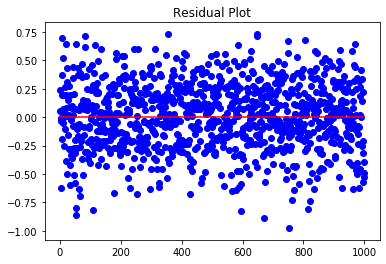

In [60]:
# residual plot
x = [i for i in range(1,len(y_pred)+1)]
x_plot =plt.scatter(x,(y_pred-y_test),c='blue')
plt.plot(x,[0]*len(y_pred),c='red')
plt.title('Residual Plot')

## Ridge regression

In [61]:
from sklearn.linear_model import Ridge,Lasso
#alpha_range = [0.01,0.05,0.5,5]
ridgereg = Ridge(alpha=0.01,normalize=True)
ridgereg.fit(x_train,y_train)
predridge = ridgereg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predridge))
r2 = r2_score(y_test,predridge)
print("RMse = ",rmse , "R2 = ",r2 )

RMse =  0.29383870257588485 R2 =  0.9129125461675699


## Lasso Regrssion

In [62]:
lassoreg = Lasso(alpha=0.0001,normalize=True)
lassoreg.fit(x_train,y_train)
pred_lasso = lassoreg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred_lasso))
r2 = r2_score(y_test,pred_lasso)
print("RMse = ",rmse , "R2 = ",r2 )

RMse =  0.2907874631191004 R2 =  0.9147117987655901


## Conclusion

we have used machine learning algorithms to predict the house prices. We have mentioned the step by step procedure to analyze the dataset and finding the correlation between the parameters. 
 
 Thus we can select the parameters which are not  correlated to  each other and are independent in nature. These feature set were then given as an input to algorithms. 
 
 Hence we calculated the performance of each model using different performance metrics and compared them based on these metrics. 
 
 We found that Linear Regression fits our dataset and 
- gives the R2_Score of 91.27%.
- Ridge Regression gives the R2_Score of 91.29%
- Lasso Regression gives the R2_Score of 91.47%. 